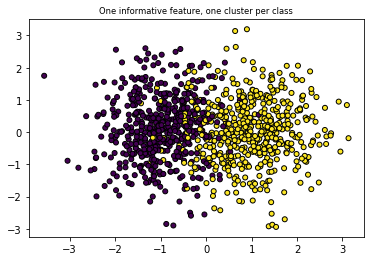

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = [10,8]
from sklearn.datasets import make_classification
n_samples = 1000
n_outliers = 100

X, y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

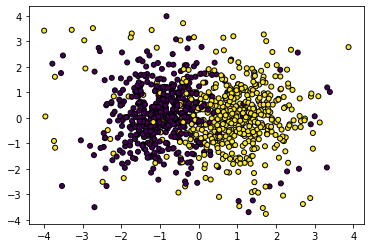

In [2]:
import numpy as np
# Replace first N samples with outliers

X[:n_outliers] =8 * np.random.random_sample((100, 2)) - 4
y[:n_outliers] = np.random.randint(2,size=n_outliers)
#visualize data
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [3]:
from scipy.stats.stats import pearsonr
pearsonr(X[:, 0],  X[:, 1])

(-0.05449065504007549, 0.08502056344228866)

In [22]:
k, _ = pearsonr(X[:, 0],  X[:, 1])

In [5]:
np.corrcoef(X[:, 0], X[:, 1])

array([[ 1.        , -0.05449066],
       [-0.05449066,  1.        ]])

In [6]:
import statistics
mean1 = statistics.mean(X[:, 0])  
varience1 = np.var(X[:, 0], ddof = 1)
mean2 = statistics.mean(X[:, 1])  
varience2 = np.var(X[:, 1], ddof = 1)

In [7]:
print(mean1, varience1)
print(mean2, varience2)

-0.02043715615405034 1.7663947089732797
0.08335729891159356 1.4197968012168845


In [8]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [9]:
x1 = normal_dist(np.arange(-4,5, 0.1), mean1, np.sqrt(varience1))

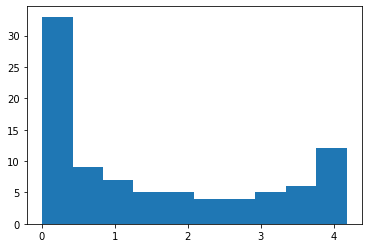

In [10]:
# modeled data
plt.hist(x1)
plt.show()

In [12]:
x1_k = normal_dist(np.arange(-4,5, 0.1), mean1, k)

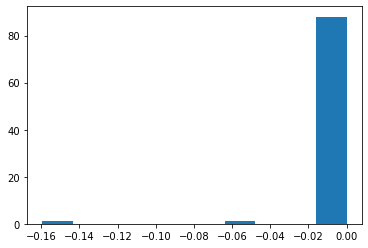

In [13]:
plt.hist(x1_k)
plt.show()

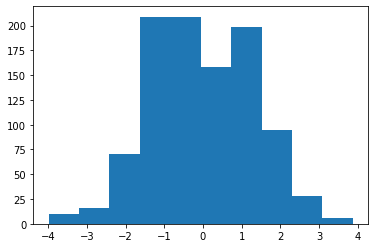

In [11]:
# real data
plt.hist(X[:, 0])
plt.show()

# formula from slide

![title](123456789.png)

In [24]:
def normal_dist_gda(x , mean, r, n):
    prob_density = ((2*np.pi)**n)*np.abs(r) * np.exp(-0.5*np.transpose(x-mean)*np.linalg.inv(r)*(x-mean))
    return prob_density

In [26]:
x1_gda = normal_dist_gda(X[:, 0] , mean1, k, len(X[:, 0]))

OverflowError: (34, 'Result too large')

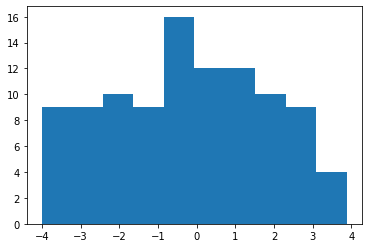

In [20]:
plt.hist(X[:, 0][:100])
plt.show()

array([-3.28393315, -0.35002294,  0.33814755, -1.73168737, -0.12025651,
        1.74809073, -3.71359537, -2.73569693,  1.68420544,  3.00190283])